<center> <h1> Mengendalikan Kursi Roda dengan Arah Pandang Mata Menggunakan Metode Eye Movement Detection Facial Landmark dan KNN </h1> </center>



# Anggota Kelompok
<hr>

*   Duwi Purnama Sidik (195150219111001)
*   Andres Kurnia Adry (195150201111025)

### Dataset

Dataset yang digunakan berasal dari link : https://www.kaggle.com/datasets/kayvanshah/eye-dataset.
Eye dataset yang digunakan berjumlah 14.360 file yang terbagi atas 4 label. Labelnya yaitu :
*   close_look, jumlahnya 3828 file
*   forward_lock, jumlahnya 3457 files
*   left_look, jumlahnya 3498 files
*   right_lok, jumlahnya 3577 files


#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import PIL
import io
import html
import dlib
import math
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from imutils import face_utils
startTime = datetime.now()

#### Load Dataset dari Github

In [ ]:
# Clone Github
!git clone https://github.com/dunasi4139/visicomputer.git

Cloning into 'visicomputer'...
remote: Enumerating objects: 11299, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 11299 (delta 12), reused 40 (delta 12), pack-reused 11258
Receiving objects: 100% (11299/11299), 128.05 MiB | 32.18 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Checking out files: 100% (14372/14372), done.


In [ ]:
# import Dataset dari Clone Github
base_dir = '/content/visicomputer/'
train_val_dir = os.path.join(base_dir,"eye-dataset")

In [ ]:
# Menampilkan 4 Folder dari dataset class
os.listdir(train_val_dir)

['right_look', 'forward_look', 'left_look', 'close_look']

#### Preprocessing

In [ ]:
# Menset Nama Variabel label, size image, train  data, array pixcel, dan target label int
label = ['close_look','forward_look','left_look','right_look']
IMG_SIZE = 50
train_data = []
X = []
y = []

In [ ]:
# Merubah Pixcel ke array sejumlah banyaknya data dengan resize gambar 50x50
for l in label :
  path = os.path.join(train_val_dir, l)
  class_num = label.index(l)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img) , cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      train_data.append([new_array,class_num])
    except Exception as e:
      pass

In [ ]:
# Memasukkan Data Train ke fitur(X) dan label(y)
for fitur, label in train_data :
    X.append(fitur)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE)

In [ ]:
X.shape

(14360, 50, 50)

In [ ]:
# Cek Data Array ke 1
print(X[1])

[[92 93 93 ... 58 57 56]
 [93 95 95 ... 60 58 56]
 [95 97 95 ... 60 57 58]
 ...
 [74 74 76 ... 82 81 80]
 [75 74 73 ... 83 82 79]
 [75 74 74 ... 82 82 80]]


In [ ]:
# cek label
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

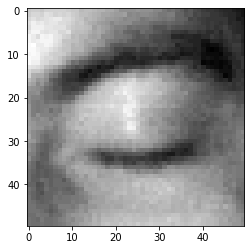

In [ ]:
# Menampilkan Data Image
plt.imshow(np.squeeze(X[1]), cmap = "gray")
plt.show()

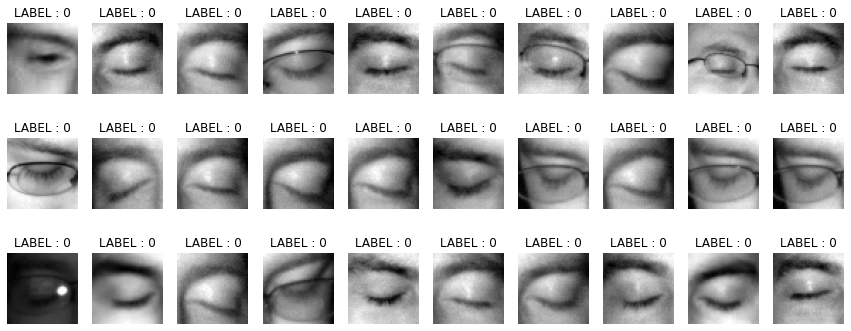

In [ ]:
# Menampilkan Banyak Gambar dengan labelnya
figure, axes = plt.subplots(3,10, figsize = (15,6))

for ax, img, l in zip(axes.ravel(), X, y) :
  ax.axis('off')
  ax.imshow(np.squeeze(img), cmap = "gray")
  ax.set_title("LABEL : " + str(l))

#### Training

In [ ]:
# Membagi data menjadi data latih dan data uji
(X_train, X_test, y_train, y_test) = train_test_split(
	X, y, test_size=0.30, random_state=99, stratify = y)

In [ ]:
X_train.shape

(10052, 50, 50)

In [ ]:
X_test.shape

(4308, 50, 50)

In [ ]:
# Merubah Array 3d menjadi 2d untuk data X_train
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [ ]:
# Memmodelkan Data dan Fitting KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Memprediksi
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi Prediksi
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1148
           1       0.96      0.99      0.98      1037
           2       0.99      0.98      0.99      1050
           3       0.98      0.97      0.98      1073

    accuracy                           0.98      4308
   macro avg       0.98      0.98      0.98      4308
weighted avg       0.98      0.98      0.98      4308



In [ ]:
# Nilai Akurasi
acc = model.score(X_test, y_test)
acc

0.9825905292479109

In [ ]:
# Nilai Run Time
print(datetime.now() - startTime)

0:00:33.743908


#### Prediksi Menggunakan Video

In [ ]:
# Convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
fonts = cv2.FONT_HERSHEY_COMPLEX

# colors
YELLOW = (0, 247, 255)
CYAN = (255, 255, 0)
MAGENTA = (255, 0, 242)
GOLDEN = (32, 218, 165)
LIGHT_BLUE = (255, 9, 2)
PURPLE = (128, 0, 128)
CHOCOLATE = (30, 105, 210)
PINK = (147, 20, 255)
ORANGE = (0, 69, 255)
GREEN = (0, 255, 0)
LIGHT_GREEN = (0, 255, 13)
LIGHT_CYAN = (255, 204, 0)
BLUE = (255, 0, 0)
RED = (0, 0, 255)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
LIGHT_RED = (2, 53, 255)


# face detector object
detectFace = dlib.get_frontal_face_detector()
# landmarks detector
predictor = dlib.shape_predictor(
    "/content/visicomputer/train/shape_predictor_68_face_landmarks.dat")

# function


def midpoint(pts1, pts2):
    x, y = pts1
    x1, y1 = pts2
    xOut = int((x + x1)/2)
    yOut = int((y1 + y)/2)
    # print(xOut, x, x1)
    return (xOut, yOut)


def eucaldainDistance(pts1, pts2):
    x, y = pts1
    x1, y1 = pts2
    eucaldainDist = math.sqrt((x1 - x) ** 2 + (y1 - y) ** 2)

    return eucaldainDist

# creating face detector function


def faceDetector(image, gray, Draw=True):
    cordFace1 = (0, 0)
    cordFace2 = (0, 0)
    # getting faces from face detector
    faces = detectFace(gray)

    face = None
    # looping through All the face detected.
    for face in faces:
        # getting coordinates of face.
        cordFace1 = (face.left(), face.top())
        cordFace2 = (face.right(), face.bottom())

        # draw rectangle if draw is True.
        if Draw == True:
            cv2.rectangle(image, cordFace1, cordFace2, GREEN, 2)
    return image, face


def faceLandmakDetector(image, gray, face, Draw=True):
    # calling the landmarks predictor
    landmarks = predictor(gray, face)
    pointList = []
    # looping through each landmark
    for n in range(0, 68):
        point = (landmarks.part(n).x, landmarks.part(n).y)
        # getting x and y coordinates of each mark and adding into list.
        pointList.append(point)
        # draw if draw is True.
        if Draw == True:
            # draw circle on each landmark
            cv2.circle(image, point, 3, ORANGE, 1)
    return image, pointList

# Blink detector function.


def blinkDetector(eyePoints):
    top = eyePoints[1:3]
    bottom = eyePoints[4:6]
    # finding the mid point of above points
    topMid = midpoint(top[0], top[1])
    bottomMid = midpoint(bottom[0], bottom[1])
    # getting the actual width and height eyes using eucaldainDistance function
    VerticalDistance = eucaldainDistance(topMid, bottomMid)
    HorizontalDistance = eucaldainDistance(eyePoints[0], eyePoints[3])
    # print()

    blinkRatio = (HorizontalDistance/VerticalDistance)
    return blinkRatio, topMid, bottomMid

# Eyes Tracking function.


def EyeTracking(image, gray, eyePoints):
    # getting dimensions of image
    dim = gray.shape
    # creating mask .
    mask = np.zeros(dim, dtype=np.uint8)

    # converting eyePoints into Numpy arrays.
    PollyPoints = np.array(eyePoints, dtype=np.int32)
    # Filling the Eyes portion with WHITE color.
    cv2.fillPoly(mask, [PollyPoints], 255)

    # Writing gray image where color is White  in the mask using Bitwise and operator.
    eyeImage = cv2.bitwise_and(gray, gray, mask=mask)

    # getting the max and min points of eye inorder to crop the eyes from Eye image .

    maxX = (max(eyePoints, key=lambda item: item[0]))[0]
    minX = (min(eyePoints, key=lambda item: item[0]))[0]
    maxY = (max(eyePoints, key=lambda item: item[1]))[1]
    minY = (min(eyePoints, key=lambda item: item[1]))[1]

    # other then eye area will black, making it white
    eyeImage[mask == 0] = 255

    # cropping the eye form eyeImage.
    cropedEye = eyeImage[minY:maxY, minX:maxX]

    # getting width and height of cropedEye
    height, width = cropedEye.shape

    divPart = int(width/3)

    #  applying the threshold to the eye .
    ret, thresholdEye = cv2.threshold(cropedEye, 100, 255, cv2.THRESH_BINARY)

    # dividing the eye into Three parts .
    rightPart = thresholdEye[0:height, 0:divPart]
    centerPart = thresholdEye[0:height, divPart:divPart+divPart]
    leftPart = thresholdEye[0:height, divPart+divPart:width]

    # counting Black pixel in each part using numpy.
    rightBlackPx = np.sum(rightPart == 0)
    centerBlackPx = np.sum(centerPart == 0)
    leftBlackPx = np.sum(leftPart == 0)
    pos, color = Position([rightBlackPx, centerBlackPx, leftBlackPx])
    # print(pos)

    return mask, pos, color


def Position(ValuesList):

    maxIndex = ValuesList.index(max(ValuesList))
    posEye = ''
    color = [WHITE, BLACK]
    if maxIndex == 0:
        posEye = "Right"
        color = [YELLOW, BLACK]
    elif maxIndex == 1:
        posEye = "Center"
        color = [BLACK, MAGENTA]
    elif maxIndex == 2:
        posEye = "Left"
        color = [LIGHT_CYAN, BLACK]
    else:
        posEye = "Eye Closed"
        color = [BLACK, WHITE]
    return posEye, color

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  frame = js_to_image(data)
  # grayscale img

  # Variables
  COUNTER = 0
  TOTAL_BLINKS = 0
  CLOSED_EYES_FRAME = 3
  FRAME_COUNTER = 0

  # converting frame into Gry image.
  grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  height, width = grayFrame.shape
  circleCenter = (int(width/2), 50)
  # calling the face detector funciton
  image, face = faceDetector(frame, grayFrame)
  if face is not None:

      # calling landmarks detector funciton.
      image, PointList = faceLandmakDetector(frame, grayFrame, face, False)
      RightEyePoint = PointList[36:42]
      LeftEyePoint = PointList[42:48]
      leftRatio, topMid, bottomMid = blinkDetector(LeftEyePoint)
      rightRatio, rTop, rBottom = blinkDetector(RightEyePoint)
      blinkRatio = (leftRatio + rightRatio)/2
      cv2.circle(image, circleCenter, (int(blinkRatio*4.3)), CHOCOLATE, -1)
      cv2.circle(image, circleCenter, (int(blinkRatio*3.2)), CYAN, 2)
      cv2.circle(image, circleCenter, (int(blinkRatio*2)), GREEN, 3)

      if blinkRatio > 4:
          COUNTER += 1
          cv2.putText(image, f'Blink', (70, 50),
                    fonts, 0.8, LIGHT_BLUE, 2)
          # print("blink")
      else:
          if COUNTER > CLOSED_EYES_FRAME:
              TOTAL_BLINKS += 1
              COUNTER = 0
      cv2.putText(image, f'Total Blinks: {TOTAL_BLINKS}', (230, 17),
                fonts, 0.5, ORANGE, 2)

      # for p in LeftEyePoint:
      #     cv.circle(image, p, 3, m.MAGENTA, 1)
      mask, pos, color = EyeTracking(frame, grayFrame, RightEyePoint)
      maskleft, leftPos, leftColor = EyeTracking(
          frame, grayFrame, LeftEyePoint)

      # draw background as line where we put text.
      cv2.line(image, (30, 90), (100, 90), color[0], 30)
      cv2.line(image, (25, 50), (135, 50), WHITE, 30)
      cv2.line(image, (int(width-150), 50), (int(width-45), 50), WHITE, 30)
      cv2.line(image, (int(width-140), 90),
              (int(width-60), 90), leftColor[0], 30)

      # writing text on above line
      cv2.putText(image, f'{pos}', (35, 95), fonts, 0.6, color[1], 2)
      cv2.putText(image, f'{leftPos}', (int(width-140), 95),
                fonts, 0.6, leftColor[1], 2)
      cv2.putText(image, f'Right Eye', (35, 55), fonts, 0.6, color[1], 2)
      cv2.putText(image, f'Left Eye', (int(width-145), 55),
                fonts, 0.6, leftColor[1], 2)

  cv2.imwrite(filename, image)

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


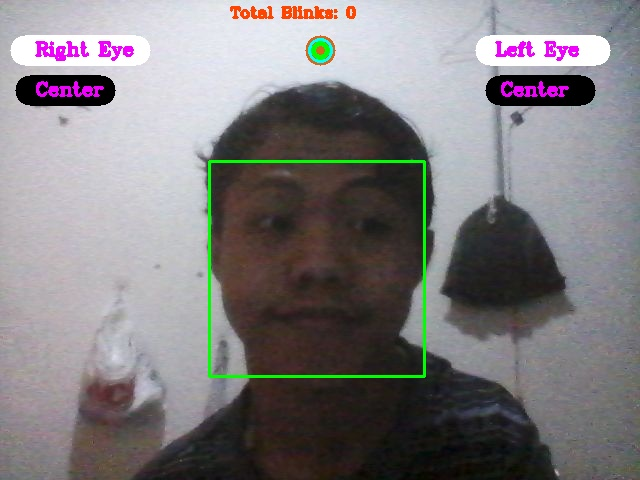

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# Nilai Run Time
print(datetime.now() - startTime)

0:00:47.286654
